# Data Load and Preprocessing

In [89]:
import pandas as pd
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
dat = pd.read_csv("trainsplit.csv")
rng = RandomState()

In [91]:
# counts of unique minerals in the dataset:
dat['Mineralogy'].value_counts()

Epidote                282744
Hornblende             275289
Titanite               243271
Ilmenite               143228
Fe oxide               132476
Rutile                 126660
Fe-silicate             41160
Fe Al-silicate          27255
Al silicate             22752
Quartz                  20271
Amphibole               19524
Orthopyroxene           19043
Apatite                 16932
Biotite                 14430
Almandine                6579
REE silicate             4403
MnFe oxide               4321
Barite                   4034
Zircon                   3296
Mn oxide                 2358
Monazite                 1999
Chloritoid               1209
Fe silicate              1055
Uvite (tourmaline)        893
Ancylite                  422
YFe-silicate              363
Carbonate                 295
Xenotime                  261
Thorite                   200
Ferberite (W oxide)       102
Cassiterite                60
Zn_Fe_Al_silicate?         47
As oxide                   46
Arsenopyri

In [92]:
#Minerals as a percentage of the dataset 
dat['Mineralogy'].value_counts(normalize=True)*100

Epidote                19.950101
Hornblende             19.424084
Titanite               17.164930
Ilmenite               10.106008
Fe oxide                9.347359
Rutile                  8.936988
Fe-silicate             2.904204
Fe Al-silicate          1.923082
Al silicate             1.605356
Quartz                  1.430299
Amphibole               1.377592
Orthopyroxene           1.343653
Apatite                 1.194703
Biotite                 1.018165
Almandine               0.464207
REE silicate            0.310671
MnFe oxide              0.304885
Barite                  0.284635
Zircon                  0.232562
Mn oxide                0.166378
Monazite                0.141047
Chloritoid              0.085306
Fe silicate             0.074440
Uvite (tourmaline)      0.063009
Ancylite                0.029776
YFe-silicate            0.025613
Carbonate               0.020815
Xenotime                0.018416
Thorite                 0.014112
Ferberite (W oxide)     0.007197
Cassiterit

In [93]:
#dropping minerals with less than or equal to 10 counts:
counts = dat['Mineralogy'].value_counts()
dat = dat[~dat['Mineralogy'].isin(counts[counts <= 10].index)]

In [94]:
# Minerals with the least counts 
dat['Mineralogy'].value_counts().tail(5)

Fe-sulphide            18
Tapiolite (TaNb)       15
Co-oxide               14
Mottramite (CuPbVO)    13
Fe-sulphide_Cu         12
Name: Mineralogy, dtype: int64

In [95]:
# deleting rows with NAs:
dat.dropna(inplace = True)

In [96]:
#replacing all 0.5s to zeros:
dat.replace(0.5, 0)
dat = dat.drop(['Unnamed: 0','x','y','z'],axis=1)

In [97]:
# splitting 12.5 percent of "dat" into validation and remaining into training.
train = dat.sample(frac= 0.875, random_state=rng)
val = dat.loc[~dat.index.isin(train.index)]

In [98]:
#Number of rows in dat:
dat.shape[0]

1417242

In [99]:
#number of rows in train dataset:
train.shape[0]

#This makes 70% of the model

1240087

In [100]:
#number of rows in validation dataset:
val.shape[0]

# this makes 10% of the model

177155

In [101]:
# loading the testing dataset:
test = pd.read_csv("testsplit.csv")

In [102]:
#replacing all 0.5s to zeros:
test.replace(0.5, 0)

,Unnamed: 0,x,y,Ag_counts,Al_counts,As_counts,Au_counts,Ba_counts,Bi_counts,Ca_counts,...,Ti_counts,Tl_counts,U_counts,V_counts,W_counts,Y_counts,Zn_counts,Zr_counts,z,Mineralogy
0,1026887,22800,23800,2.0,6.0,0.0,1.0,0.0,10.0,620.0,...,882.0,0.0,0.0,70.0,0.0,2.0,0.0,8.0,3600.0,Titanite
1,635550,37200,12200,4.0,18.0,0.0,2.0,0.0,0.0,312.0,...,21.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2100.0,Hornblende
2,373813,8000,3000,4.0,20.0,0.0,0.0,0.0,0.0,609.0,...,29.0,4.0,2.0,2.0,0.0,2.0,0.0,0.0,11000.0,Epidote
3,270204,22600,37000,3.0,5.0,0.0,2.0,0.0,4.0,2.0,...,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,Fe oxide
4,312377,31200,36800,1.0,6.0,0.0,0.0,0.0,0.0,305.0,...,7.0,5.0,16.0,0.0,0.0,3.0,0.0,0.0,2300.0,Hornblende
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368522,741637,9600,37400,0.0,6.0,0.0,2.0,0.0,0.0,21.0,...,5613.0,0.0,0.0,401.0,0.0,0.0,0.0,0.0,2000.0,Rutile
368523,123901,16800,27200,10.0,23.0,18.0,20.0,0.0,27.0,946.0,...,1142.0,10.0,17.0,96.0,0.0,21.0,4.0,31.0,4800.0,Titanite
368524,1229339,30800,39400,0.0,0.0,0.0,0.0,0.0,0.0,39.0,...,142.0,1.0,0.0,21.0,0.0,0.0,0.0,0.0,4600.0,Hornblende
368525,1192243,6800,1800,2.0,0.0,0.0,1.0,0.0,13.0,53.0,...,6.0,27.0,5.0,0.0,0.0,0.0,14.0,0.0,NaN,NaN


In [103]:
# deleting rows with NAs:
test.dropna(inplace = True)
test = test.drop(['Unnamed: 0','x','y','z'],axis=1)

In [104]:
#number of rows in testing dataset:
test.shape[0]

#this makes 20% of the model

354308

# Exploratory Data Analysis

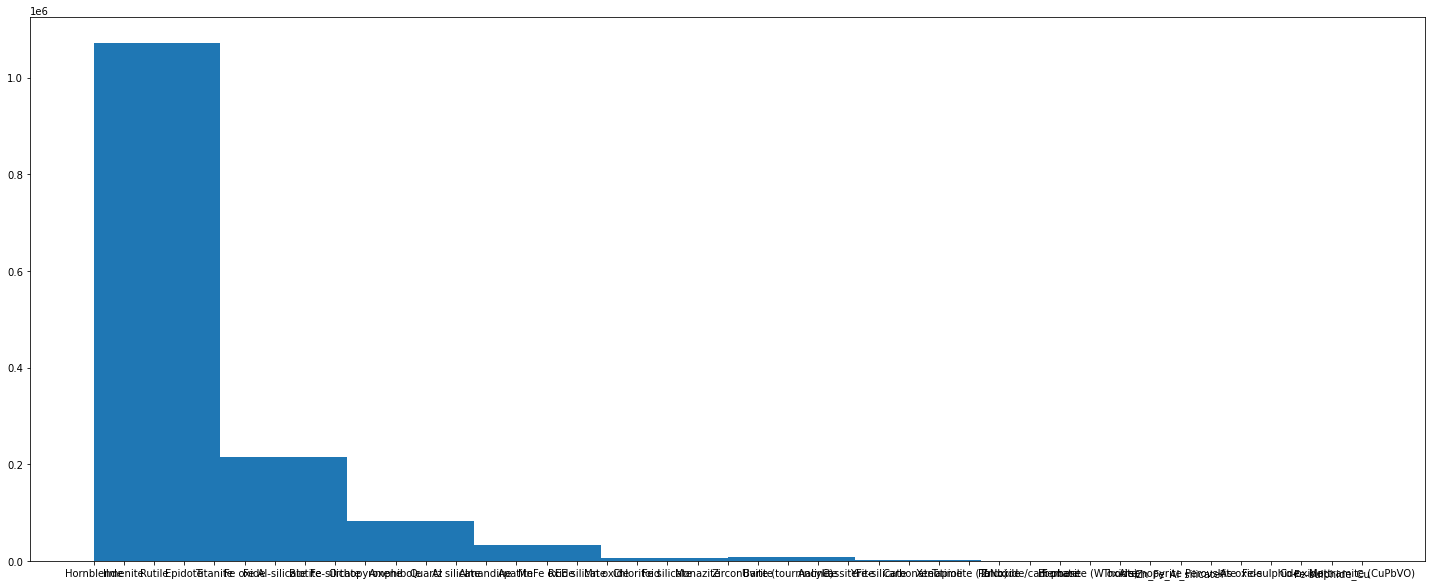

In [17]:
# Histogram of minerals count
plt.figure(figsize=(25,10))
plt.hist(dat['Mineralogy'])
plt.show()

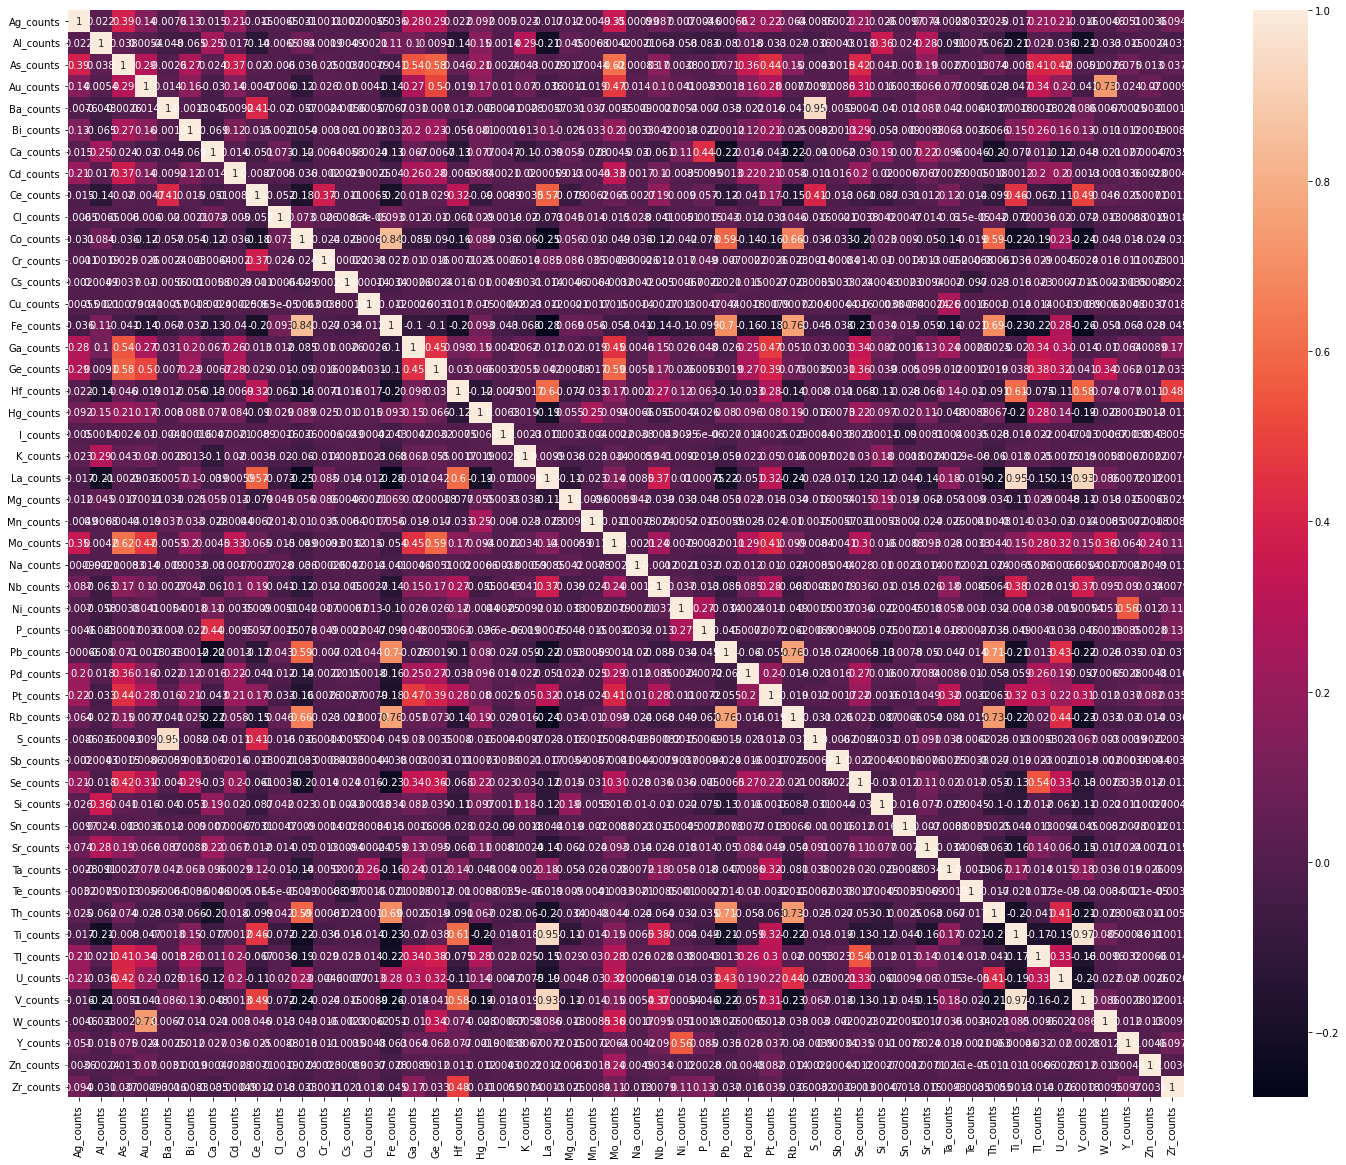

In [18]:
# Correlation of different element counts with mineral names
plt.figure(figsize=(25,20))
corrMatrix = dat.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Model Implementation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
y_train = train['Mineralogy']
X_train = train.drop(['Mineralogy'],axis=1)
y_test = test['Mineralogy']
X_test = test.drop(['Mineralogy'],axis=1)
y_val = val['Mineralogy']
X_val = val.drop(['Mineralogy'],axis=1)

In [19]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class = 'multinomial',solver = 'sag')

In [20]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

**Results**

In [21]:
# Results on validation set
score = model.score(X_val, y_val)
print(score) 

0.7137026897349779


In [22]:
# Results on test set
pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred)

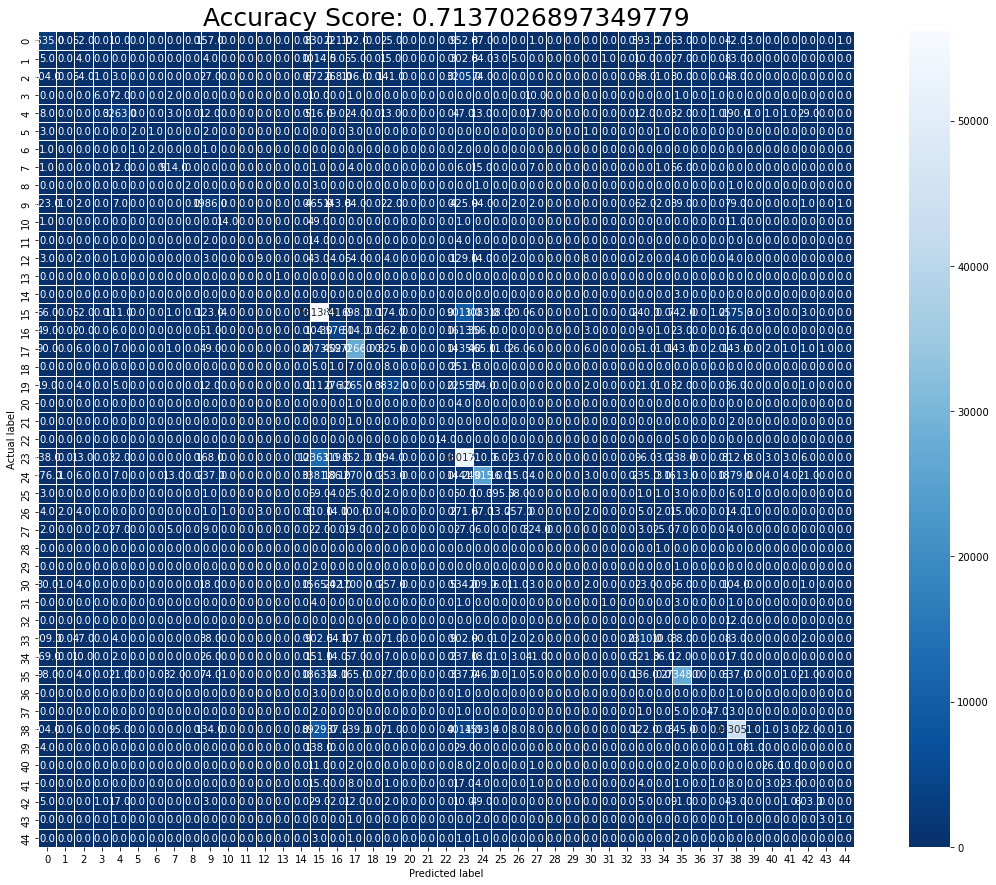

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 25);

In [25]:
print(classification_report(y_test, pred, zero_division=0))

                     precision    recall  f1-score   support

        Al silicate       0.62      0.46      0.53      5776
          Almandine       0.00      0.00      0.00      1617
          Amphibole       0.19      0.01      0.02      4832
           Ancylite       0.60      0.06      0.11       103
            Apatite       0.88      0.78      0.83      4192
       Arsenopyrite       0.67      0.15      0.25        13
           As oxide       0.67      0.29      0.40         7
             Barite       0.94      0.90      0.92      1017
           Bi phase       1.00      0.29      0.44         7
            Biotite       0.63      0.56      0.59      3540
          Carbonate       0.70      0.18      0.29        76
        Cassiterite       0.00      0.00      0.00        20
         Chloritoid       0.75      0.03      0.06       296
           Co-oxide       1.00      1.00      1.00         1
              CuPbS       0.00      0.00      0.00         3
            Epidote    

### Top 3 and unknon classification on training set

In [35]:
from collections import Counter

#define predictin probability and classes accordingly
pred_prob = list(model.predict_proba(X_train))
classes = list(model.classes_)

In [66]:
#define predictin probability and classes accordingly
pred_prob = list(model.predict_proba(X_train))
classes = list(model.classes_)

top3_name_prob_all = []
top3_combined_all = []
for i in range(len(pred_prob)):
    name_prob = dict(zip(classes, pred_prob[i]))
    #extract top 3 probability and their classes
    c = Counter(name_prob)
    top3_name_prob = c.most_common(3)
    top3_name_prob = dict(top3_name_prob)
    # extract top 3 classes and their combined probability
    top3_combined_prob = sum(top3_name_prob.values())
    top_3_minerals = list(top3_name_prob.keys())
    top_3_mineral = " "
    for minerals in top_3_minerals:
        top_3_mineral += "(" + minerals + ")"
    top3_combined = {}
    top3_combined[top_3_mineral] = top3_combined_prob
    # replace classes into unknown if combined probability is below 50%
    for i in top3_combined.values():
        if i < 0.5:
            if top_3_mineral in top3_combined:
                del top3_combined[top_3_mineral]
            top3_combined["Unknown"] = top3_combined_prob
    top3_name_prob_all.append(top3_name_prob.copy())
    top3_combined_all.append(top3_combined.copy())
    


In [158]:
train["top3_name_prob_all_df"] = pd.Series(top3_name_prob_all, index = train.index[:len(top3_name_prob_all)])
train["top3_combined_all_df"] = pd.Series(top3_combined_all, index = train.index[:len(top3_name_prob_all)])
train.to_csv("top3_combined_Probability", encoding='utf-8')

### Top 3 and unknon classification on test set


In [202]:
#define predictin probability and classes accordingly
pred_prob = list(model.predict_proba(X_test))
classes = list(model.classes_)
top3_name_prob_all = []
top3_combined_all = []
for i in range(len(pred_prob)):
    name_prob = dict(zip(classes, pred_prob[i]))
    #extract top 3 probability and their classes
    c = Counter(name_prob)
    top3_name_prob = c.most_common(3)
    top3_name_prob = dict(top3_name_prob)
    top3_name_prob_rounded = {}
    for key in top3_name_prob.keys():
        top3_name_prob_rounded[key] = round(top3_name_prob[key], 4)
    # extract top 3 classes and their combined probability
    top3_combined_prob = sum(top3_name_prob_rounded.values())
    top3_combined_prob = float(top3_combined_prob)
    top3_combined_prob = round(top3_combined_prob,4)
    top_3_minerals = list(top3_name_prob.keys())
    top_3_mineral = " "
    for minerals in top_3_minerals:
        top_3_mineral += "(" + minerals + ")"
    top3_combined = {}
    top3_combined[top_3_mineral] = top3_combined_prob
    # replace classes into unknown if combined probability is below 50%
    for i in top3_combined.values():
        if i < 0.5:
            if top_3_mineral in top3_combined:
                del top3_combined[top_3_mineral]
            top3_combined["Unknown"] = top3_combined_prob
    top3_name_prob_all.append(top3_name_prob_rounded.copy())
    top3_combined_all.append(top3_combined.copy())

In [206]:
test["top3_name_prob_all_df"] = pd.Series(top3_name_prob_all, index = test.index[:len(top3_name_prob_all)])
test["top3_combined_all_df"] = pd.Series(top3_combined_all, index = test.index[:len(top3_name_prob_all)])
test.to_csv("top3_combined_Probability_testset", encoding='utf-8')